In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)


Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

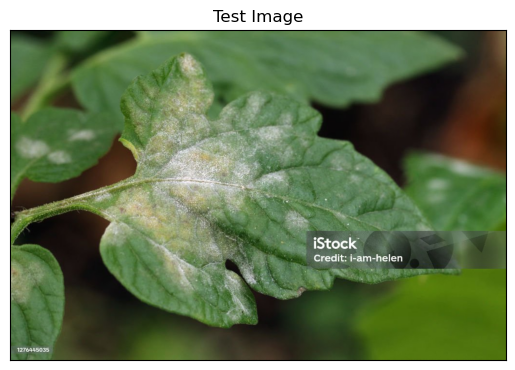

In [19]:
#Test Image Visualization
import cv2
image_path = 'test/test/0101.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [20]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [21]:
print(predictions)

[[4.3175884e-02 1.1568620e-01 1.6322831e-02 7.3462445e-04 9.0681575e-04
  8.6789211e-04 1.2320696e-04 1.3893776e-01 3.8062938e-02 1.7941745e-02
  4.1086424e-02 1.9639425e-03 1.9925050e-03 3.6032009e-03 1.0284006e-03
  5.5193523e-04 3.0130312e-02 8.5266872e-04 6.2889066e-03 3.7884188e-03
  2.2562565e-03 3.8631759e-05 4.5459831e-04 1.9890467e-04 3.1262283e-05
  7.5508514e-03 4.3295439e-02 5.8306905e-05 1.8555138e-03 7.5920373e-02
  4.0182361e-01 8.3279381e-05 5.7358982e-04 7.7409066e-05 9.5134135e-04
  6.9471635e-04 4.6639518e-05 4.2640546e-05]]


In [22]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

30


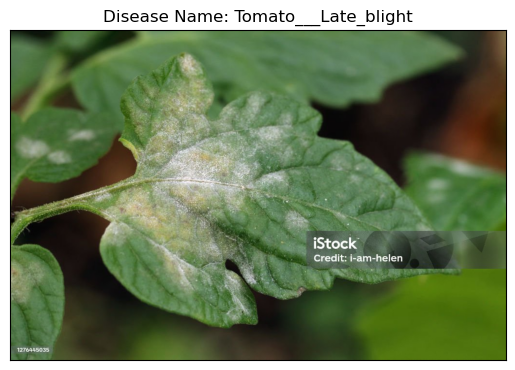

In [23]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()